In [237]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn import tree

In [238]:
df_prospective = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Prospective')

In [239]:
df_retro = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Retro')

In [240]:
#checking shape of dataframe
df_prospective.shape

(921, 161)

In [241]:
#checking shape of dataframe 
df_retro.shape

(2391, 161)

In [242]:
df_prospective['data_record'] = 'prospective' 

In [243]:
df_retro['data_record'] = 'retro' 

In [244]:
df = df_prospective.append(df_retro)

In [245]:
df.shape

(3312, 162)

In [246]:
df.head(10)

,PATIENT NUMBER,PROC NAME,CENTER CODE,SURGEON CODE,REC PROGRESS,CREATED DATE,GENDER,DATE OF BIRTH,AGE AT SURGERY,MARITAL STATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),ECOG,CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,TYPE OF SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,PRE-OP MULTIFOCALITY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO SCORE,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,LOCATION TO POLAR LINE,Tumor Consistency on Imaging,Bosniak Classification,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,MULTIFOCALITY,NO OF LESIONS,Imaging Features of other excised tumor,Consistency of the other excised tumor/s,ACCESS,DA VINCI MODEL,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,PRIMARY SURGEON,OPERATIVE TIME(min),ISCHEMIA,CLAMP ARTERY,SELECTIVE ARTERIAL CLAMPING,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,INNER RENORRHAPHY,OUTER RENORRHAPHY,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,HAEMOSTATIC Details,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,SURGICAL CONSIDERATIONS,INTRA-OP COMPLICATION,INTRA-OP COMPLICATIONS,Need to Convert to Radical Nephrectomy,TREATMENT OF COMPLICATION,POST-OP COMPLICATION,SURGICAL COMPLICATIONS,NON SURGICAL COMPLICATIONS,POST-OP TREATMENT OF COMPLICATION,CLAVIEN GRADE,POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,HYSTOTYPE BENIGN YES,FUHRMAN GRADING,SARCOMATOID DIFF,%SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,Hilar Fat Invasion,SINUS FAT INVASION,MIC SCORE,ADRENAL INVASION,GEROTA INVASION,Renal Vein Invasion,VENOUS THROMBUS,SURGICAL MARGIN,UNIFOCAL/MULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITE OF POSITIVE NODE,TREATMENT PSM,PT,PN,OTHER TUMORS,DATE OF RECURRENCE,LAST FOLLOW UP DURATION,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,CWQW6ZDS,Follow-up1,2017-09-24 18:30:00.0,Female,1967.0,50.0,Married,Others,Graduate,57.00,168.0,20.20,7.0,"Fully active, able to carry on all pre-disease performance without restriction",0.0,2.0,Absent,No,NaN,No,Left,Left,No,Posterior,Lower Pole,13.2,50,7800,0.63,67.7,100.030000,50,168.5,12.0,3(High Risk),"Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)",At the medial rim (2 points),With renal sinus involvement (2 points),"With involving, dislocation or infiltration of the UCS (2 points)",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,11x,3(High Risk),=>7,<50%,=<4,Neither(x),3.0,Entirely solid,Entirely solid tumor,2017-09-24 00:00:00.0,Category 1,Elective,No,1.0,NP,Entirely solid tumor,Transperitoneal,Xi,4-arms,5 mm + 12 mm,No,Staff,3:40,Warm,Satinsky Clamp,No,Satinsky Clamp,No,Not Used,Yes,Yes,24,Performed,Yes,Surgicel+surgiflo,Not Performed,600,1 Unit,NaN,Yes,"180,310",No,NaN,No Complications,NaN,NaN,NaN,Grade 0: Absence of any complication,9.5,28.8,0.8,75.7,14600,999.0,999.0,999,999,999,999.0,999.0,999.00,999,999,5.0,8.5,0.4,0.4,Absent,Beni

In [247]:
df.describe()

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP CREAT,PRE-OP EGFR,PADUA SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00000,3294.000000,2327.000000,2289.00000,2958.000000,3122.000000,2737.000000,2702.000000,3264.000000,2569.000000,2123.000000,1944.000000,2678.000000,1114.000000,1154.000000,986.000000,996.000000,1199.000000,3067.000000,2781.000000,1664.000000,974.000000,1365.000000,2290.000000,1923.000000
mean,1955.81136,57.843655,90.291609,161.08460,28.906286,43.947341,1.522835,3.541451,6.943323,80.452488,8.404145,1.899177,1.053771,335.618887,349.216124,468.772809,509.636336,376.595229,3.161722,11.626124,274.839844,690.035421,14.015385,0.297817,16.916485
std,13.14144,12.702301,40.666559,29.14078,8.013751,333.125372,1.916268,2.199328,76.017258,24.170568,1.748467,0.822433,0.266591,458.270906,456.519416,490.323768,484.899641,483.504763,2.479386,40.328840,2490.582220,3321.287384,154.822902,0.457398,19.503374
min,1921.00000,0.000000,7.711150,51.00000,2.320000,0.000000,0.000000,0.000000,0.000000,0.266354,2.000000,1.000000,0.000000,1.330000,0.204000,0.300000,0.284000,0.270000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,-0.800000
25%,1946.00000,49.000000,69.000000,160.00000,24.610000,21.000000,0.000000,2.000000,0.780000,65.720000,7.000000,1.000000,1.000000,11.300000,31.800000,11.500000,33.075000,1.000000,2.000000,2.400000,1.000000,3.625000,0.000000,0.000000,3.000000
50%,1955.00000,59.000000,80.000000,169.00000,27.700000,30.000000,1.000000,3.000000,0.910000,79.572342,8.000000,2.000000,1.000000,13.000000,37.000000,14.350000,45.500000,1.400000,3.000000,3.500000,3.000000,999.000000,0.000000,0.000000,10.000000
75%,1965.00000,67.000000,94.750000,176.00000,31.910000,42.000000,2.000000,5.000000,1.100000,94.000000,10.000000,3.000000,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,4.000000,7.300000,11.000000,999.000000,0.000000,1.000000,24.000000
max,2015.00000,89.000000,377.000000,208.30000,304.000000,18200.000000,19.000000,14.000000,999.000000,253.971416,14.000000,3.000000,5.000000,999.000000,999.000000,999.000000,999.000000,999.000000,51.000000,999.000000,99999.000000,99999.000000,999.000000,1.000000,101.000000


In [248]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 162 columns):
PATIENT NUMBER                              3312 non-null object
PROC NAME                                   3312 non-null object
CENTER CODE                                 3312 non-null object
SURGEON CODE                                921 non-null object
REC PROGRESS                                3312 non-null object
CREATED DATE                                3312 non-null object
GENDER                                      3302 non-null object
DATE OF BIRTH                               1919 non-null float64
AGE AT SURGERY                              3294 non-null float64
MARITAL STATUS                              2080 non-null object
RACE                                        2016 non-null object
EDUCATION                                   1843 non-null object
WEIGHT                                      2327 non-null float64
HEIGHT                                      2

In [249]:
numeric_col_list = [
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',
 'PADUA RISK',
 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
'BLOOD LOSS (ml)',
'R.E.N.A.L. NEPHRO SCORE',
'OPERATIVE TIME(min)',
'ISCHEMIA TIME (min)',
] 
numeric_col_list

['PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',
 'PADUA RISK',
 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
 'BLOOD LOSS (ml)',
 'R.E.N.A.L. NEPHRO SCORE',
 'OPERATIVE TIME(min)',
 'ISCHEMIA TIME (min)']

In [250]:
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [251]:
df = df[df.columns[df.isnull().mean() < 0.30]]

In [252]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 79 columns):
PATIENT NUMBER                            3312 non-null object
PROC NAME                                 3312 non-null object
CENTER CODE                               3312 non-null object
REC PROGRESS                              3312 non-null object
CREATED DATE                              3312 non-null object
GENDER                                    3302 non-null object
AGE AT SURGERY                            3294 non-null float64
WEIGHT                                    2327 non-null float64
BMI                                       2958 non-null float64
CLINICAL SIZE (mm)                        3122 non-null float64
CHARLSON SCORE                            2737 non-null float64
CHARLSON AGE-ADJUST SCORE                 2702 non-null float64
SYMPTOMS                                  2486 non-null object
SOLITARY KIDNEY                           2787 non-null object
SIDE 

In [253]:
col = list(df.select_dtypes('object'))
unique_count_list = {col:len(df[col].unique()) for col in col}
unique_count_list

{'PATIENT NUMBER': 3312,
 'PROC NAME': 1,
 'CENTER CODE': 20,
 'REC PROGRESS': 12,
 'CREATED DATE': 684,
 'GENDER': 3,
 'SYMPTOMS': 4,
 'SOLITARY KIDNEY': 3,
 'SIDE OF SURGERY': 4,
 'FACE': 3,
 'TUMOR lOCATION': 4,
 'POLAR LOCATION': 3,
 'EXOPHYTIC RATE': 4,
 'CLINICAL SIZE GROUP': 4,
 'CT': 7,
 'CN': 4,
 'CM': 4,
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION': 5,
 'RADIUS (maximal diameter in cm)': 4,
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES': 4,
 'ANTERIOR OR POSTERIOR': 4,
 'DATE OF SURGERY': 1807,
 'ASA SCORE': 5,
 'PARTIAL NEPHRO INDICATION': 4,
 'ACCESS': 3,
 'ROBOTICS ARMS': 4,
 'ASSISTENT TROCARS': 3,
 'DUAL CONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMP ARTERY': 5,
 'CLAMP VEIN': 5,
 'EARLY UNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'UCS REPAIR': 3,
 'HAEMOSTATIC AGENTS': 3,
 'LYMPH NODE DISSECTION(LND)': 3,
 'INTRA-OP TRANSUFUSION': 4,
 'INTRA-OP COMPLICATION': 3,
 'POST-OP COMPLICATION': 3,
 'MULITIFOCALITY': 3,
 'PATHOLOGY': 3,
 'HYSTOTYPE MALIGNANAT': 3,
 'HYSTOTYPE MALIGNANAT YES': 10,
 'HYSTOTYPE BE

In [254]:
for col in unique_count_list:
    if unique_count_list[col]<10:
        df[col] = df[col].astype('category')

In [255]:
list(df.select_dtypes('object'))

['PATIENT NUMBER',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'DATE OF SURGERY',
 'HYSTOTYPE MALIGNANAT YES',
 'TYPE OF COMPLICATIONS(s)',
 'SELECTED SURGICAL COMPLICATIONS(s)',
 'SELECTED NON SURGICAL COMPLICATIONS(s)',
 'TREATMENT OF COMPLICATIONS(s)',
 'RECURRENCE(s)',
 'FOLLOW UP DATE(s)',
 'STATUS(s)',
 'TREATMENT(s)',
 'CREATININE(s)',
 'EGFR(s)',
 'SRF(s)',
 'ERPF(s)']

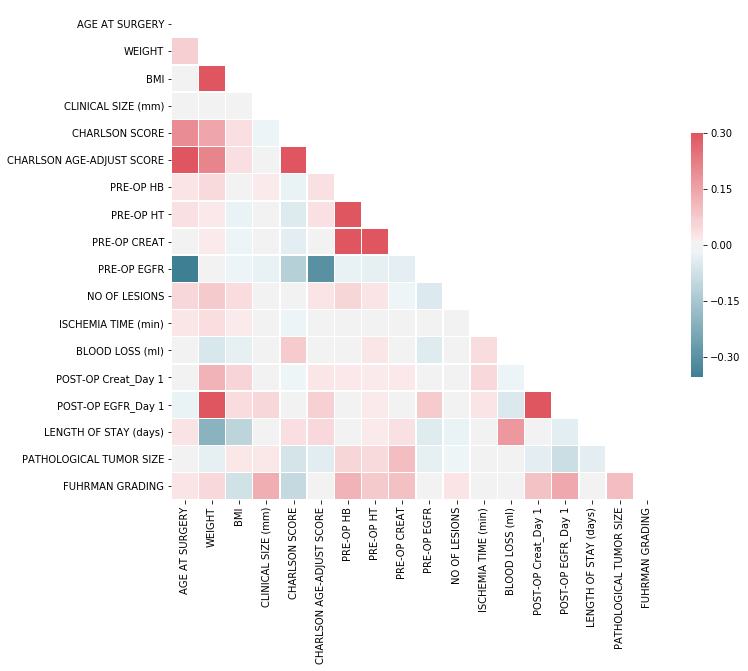

In [256]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [264]:
#need ot work from here
list(df)

['PATIENT NUMBER',
 'PROC NAME',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'GENDER',
 'AGE AT SURGERY',
 'WEIGHT',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'DATE OF SURGERY',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',
 'ROBOTICS ARMS',
 'ASSISTENT TROCARS',
 'DUAL CONSOLE',
 'ISCHEMIA',
 'CLAMP ARTERY',
 'CLAMP VEIN',
 'EARLY UNCLAMPING',
 'FLUORESCENCE',
 'ISCHEMIA TIME (min)',
 'UCS REPAIR',
 'HAEMOSTATIC AGENTS',
 'LYMPH NODE DISSECTION(LND)',
 'BLOOD LOSS (ml)',
 'INTRA-OP TRANSUFUSION',
 'INTRA-OP COMPLICATION',
 'POST-OP COMPLICATION',
 'POST-O

In [278]:
df_filter_intra_op = df.dropna(axis = 0, subset=['INTRA-OP COMPLICATION'])

In [290]:
df_filter2 = df_filter_intra_op[['PROC NAME',
 'GENDER',
 'AGE AT SURGERY',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',
 'ROBOTICS ARMS',
 'ASSISTENT TROCARS',
 'DUAL CONSOLE',
 'ISCHEMIA',
 'CLAMP ARTERY',
 'CLAMP VEIN',
 'EARLY UNCLAMPING',
 'FLUORESCENCE',
 'ISCHEMIA TIME (min)',
 'UCS REPAIR',
 'HAEMOSTATIC AGENTS',
 'LYMPH NODE DISSECTION(LND)',
 'BLOOD LOSS (ml)',
 'INTRA-OP TRANSUFUSION']]

In [291]:
for col in list(df_filter2.select_dtypes(['object'])):
    df_filter2[col] = df_filter2[col].astype('category')

df_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852 entries, 0 to 2382
Data columns (total 44 columns):
PROC NAME                                2852 non-null category
GENDER                                   2842 non-null category
AGE AT SURGERY                           2840 non-null float64
BMI                                      2506 non-null float64
CLINICAL SIZE (mm)                       2750 non-null float64
CHARLSON SCORE                           2354 non-null float64
CHARLSON AGE-ADJUST SCORE                2412 non-null float64
SYMPTOMS                                 2189 non-null category
SOLITARY KIDNEY                          2490 non-null category
SIDE OF SURGERY                          2845 non-null category
FACE                                     2219 non-null category
TUMOR lOCATION                           2472 non-null category
PRE-OP HB                                2124 non-null float64
PRE-OP HT                                1996 non-null float64
PRE-

In [292]:
df_filter2.select_dtypes('category')

,PROC NAME,GENDER,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,ACCESS,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,ISCHEMIA,CLAMP ARTERY,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,UCS REPAIR,HAEMOSTATIC AGENTS,LYMPH NODE DISSECTION(LND),INTRA-OP TRANSUFUSION
0,Partial Nephrectomy,Female,Absent,No,Left,Posterior,Lower Pole,"Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,3(High Risk),=>7,<50%,Neither(x),Category 1,Elective,Transperitoneal,4-arms,5 mm + 12 mm,No,Warm,Satinsky Clamp,Satinsky Clamp,No,Not Used,Performed,Yes,Not Performed,1 Unit
1,Partial Nephrectomy,Female,Absent,No,Right,Posterior,Mid Pole,Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points),= 50% exophytic (1 point),=>7cm,T2a,Nx,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),Category 3,Relative,Retroperitoneal,4-arms,Only 12 mm,Yes,Warm,Bulldog,No,Yes,Used,Performed,No,Not Performed,No
2,Partial Nephrectomy,Female,Absent,No,Left,Anterior,Lower Pole,"Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)",= 50% exophytic (1 point),=>7cm,T2a,N0,M0,2(Intermidiate Risk),=>7,50%,Anterior (a),Category 2,Elective,Transperitoneal,4-arms,Only 12 mm,No,Warm,Bulldog,No,Yes,Not Used,Performed,Yes,Not Performed,No
3,Partial Nephrectomy,Male,Absent,No,Right,Posterior,Upper Pole,"Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)",= 50% exophytic (1 point),=>7cm,T1b,N0,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),Category 2,Elective,Transperitoneal,4-arms,Only 12 mm,Yes,Warm,No,No,No,Not Used,Not Performed,No,Performed,No
4,Partial Nephrectomy,Male,Absent,No,Right,Posterior,Mid Pole,Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points),< 50%exophytic (2 points),=>7cm,T2a,N0,M0,3(High Risk),=>7,<50%,Neither(x),Category 2,Elective,Transperitoneal,4-arms,Only 12 mm,No,Warm,Bulldog,Bulldog,No,Not Used,Performed,Yes,Not Performed,No
5,Partial Nephrectomy,Male,Local Symptoms,No,Left,Posterior,Mid Pole,"Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)",= 50% exophytic (1 point),4.1cm-7cm,T1a,Nx,Not Applicable,2(Intermidiate Risk),4 but <7,50%,Posterior (p),Category 1,Elective,Transperitoneal,3-arms,5 mm + 12 mm,Yes,Warm,Bulldog,No,No,Not Used,Not Performed,Yes,Not Performed,No
6,Partial Nephrectomy,Male,Absent,No,Left,Posterior,Mid Pole,Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points),< 50%exophytic (2 points),=>7cm,T2a,Nx,M0,3(High Risk),=>7,<50%,Posterior (p),Category 3,Relative,Retroperitoneal,3-arms,Only 12 mm,Yes,Warm,Bulldog,Bulldog,No,Used,Performed,Yes,Performed,No
7,Partial Nephrectomy,Female,Absent,No,Left,Anterior,Upper Pole,Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points),= 50% exophytic (1 point),4.1cm-7cm,T1b,Nx,M0,2(Intermidiate Risk),4 but <7,50%,Anterior (a),Category 3,Elective,Transperitoneal,4-arms,Only 12 mm,Yes,Warm,Bulldog,Bulldog,No,Used,Not Performed,No,Performed,No
8,Partial Nephrectomy,Male,Absent,No,Right,Anterior,Upper Pole,"Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)",= 50% exophytic (1 point),4.1cm-7cm,T1b,N0,M0,2(Intermidiate Risk),4 but <7,50%,Anterior (a),Category 2,Elective,Transperitoneal,4-arms,Only 12 mm,No,Warm,Bulldog,Bulldog,Yes,Not Used,Performed,Yes,Not Performed,No
9,Partial Nephrectomy,Male,Absent,No,Right,Posterior,Upper Pole,Tumours crossing the sinus line >50% or falling en

In [29]:
columns=df_filter2.select_dtypes('category')
df_filter2_codes = df_filter2.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in columns }
for col in columns:
    le_dict[col].fit_transform(df_filter2_codes[col])

In [30]:
#df_filter2_codes['GENDER'] = le_dict['GENDER'].transform(df_filter2_codes['GENDER'])

In [31]:
#df_filter2_codes = df_filter2
for col in columns:
    df_filter2_codes[col] = le_dict[col].transform(df_filter2_codes[col])
    

In [32]:
for col in columns:
    df_filter2_codes[col] = df_filter2_codes[col].astype('category')

In [33]:
df_filter2.head()

,GENDER,AGE AT SURGERY,BMI,RACE,SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,TUMOR lOCATION,PADUA RISK,R.E.N.A.L. NEPHRO RISK STRATIFICATION,INTRA-OP COMPLICATION
0,Female,50.0,20.20,Others,No,No,Left,Lower Pole,3(High Risk),3(High Risk),Yes
1,Female,69.0,26.37,White/Caucasian,No,No,Right,Mid Pole,3(High Risk),2(Intermidiate Risk),No
2,Female,83.0,31.10,White/Caucasian,No,No,Left,Lower Pole,2(Intermidiate Risk),2(Intermidiate Risk),No
3,Male,66.0,32.78,White/Caucasian,No,No,Right,Upper Pole,2(Intermidiate Risk),2(Intermidiate Risk),No
4,Male,61.0,28.35,Others,No,No,Right,Mid Pole,3(High Risk),3(High Risk),No


In [34]:
df_filter2_codes.head()

,GENDER,AGE AT SURGERY,BMI,RACE,SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,TUMOR lOCATION,PADUA RISK,R.E.N.A.L. NEPHRO RISK STRATIFICATION,INTRA-OP COMPLICATION
0,0,50.0,20.20,2,0,0,1,0,3,3,1
1,0,69.0,26.37,3,0,0,2,1,3,2,0
2,0,83.0,31.10,3,0,0,1,0,2,2,0
3,1,66.0,32.78,3,0,0,2,2,2,2,0
4,1,61.0,28.35,2,0,0,2,1,3,3,0


In [35]:
#X = df_filter.drop(columns=['INTRA-OP COMPLICATION'])
X = df_filter2_codes[['GENDER',
                         'AGE AT SURGERY',
                         
                         'BMI',
                         'RACE',
                         'SOLITARY KIDNEY',
                         'BILATERALITY OF TUMOR',
                         'SIDE OF TUMOR',
                         'TUMOR lOCATION',
                         'PADUA RISK',
                         'R.E.N.A.L. NEPHRO RISK STRATIFICATION']]
Y = df_filter2_codes['INTRA-OP COMPLICATION']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1948
Data columns (total 10 columns):
GENDER                                   1202 non-null category
AGE AT SURGERY                           1202 non-null float64
BMI                                      1202 non-null float64
RACE                                     1202 non-null category
SOLITARY KIDNEY                          1202 non-null category
BILATERALITY OF TUMOR                    1202 non-null category
SIDE OF TUMOR                            1202 non-null category
TUMOR lOCATION                           1202 non-null category
PADUA RISK                               1202 non-null category
R.E.N.A.L. NEPHRO RISK STRATIFICATION    1202 non-null category
dtypes: category(8), float64(2)
memory usage: 38.6 KB


In [36]:
X.head(1)

,GENDER,AGE AT SURGERY,BMI,RACE,SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,TUMOR lOCATION,PADUA RISK,R.E.N.A.L. NEPHRO RISK STRATIFICATION
0,0,50.0,20.2,2,0,0,1,0,3,3


In [37]:
Y.head(1)

0    1
Name: INTRA-OP COMPLICATION, dtype: category
Categories (2, int64): [0, 1]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [39]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(X_train, Y_train)

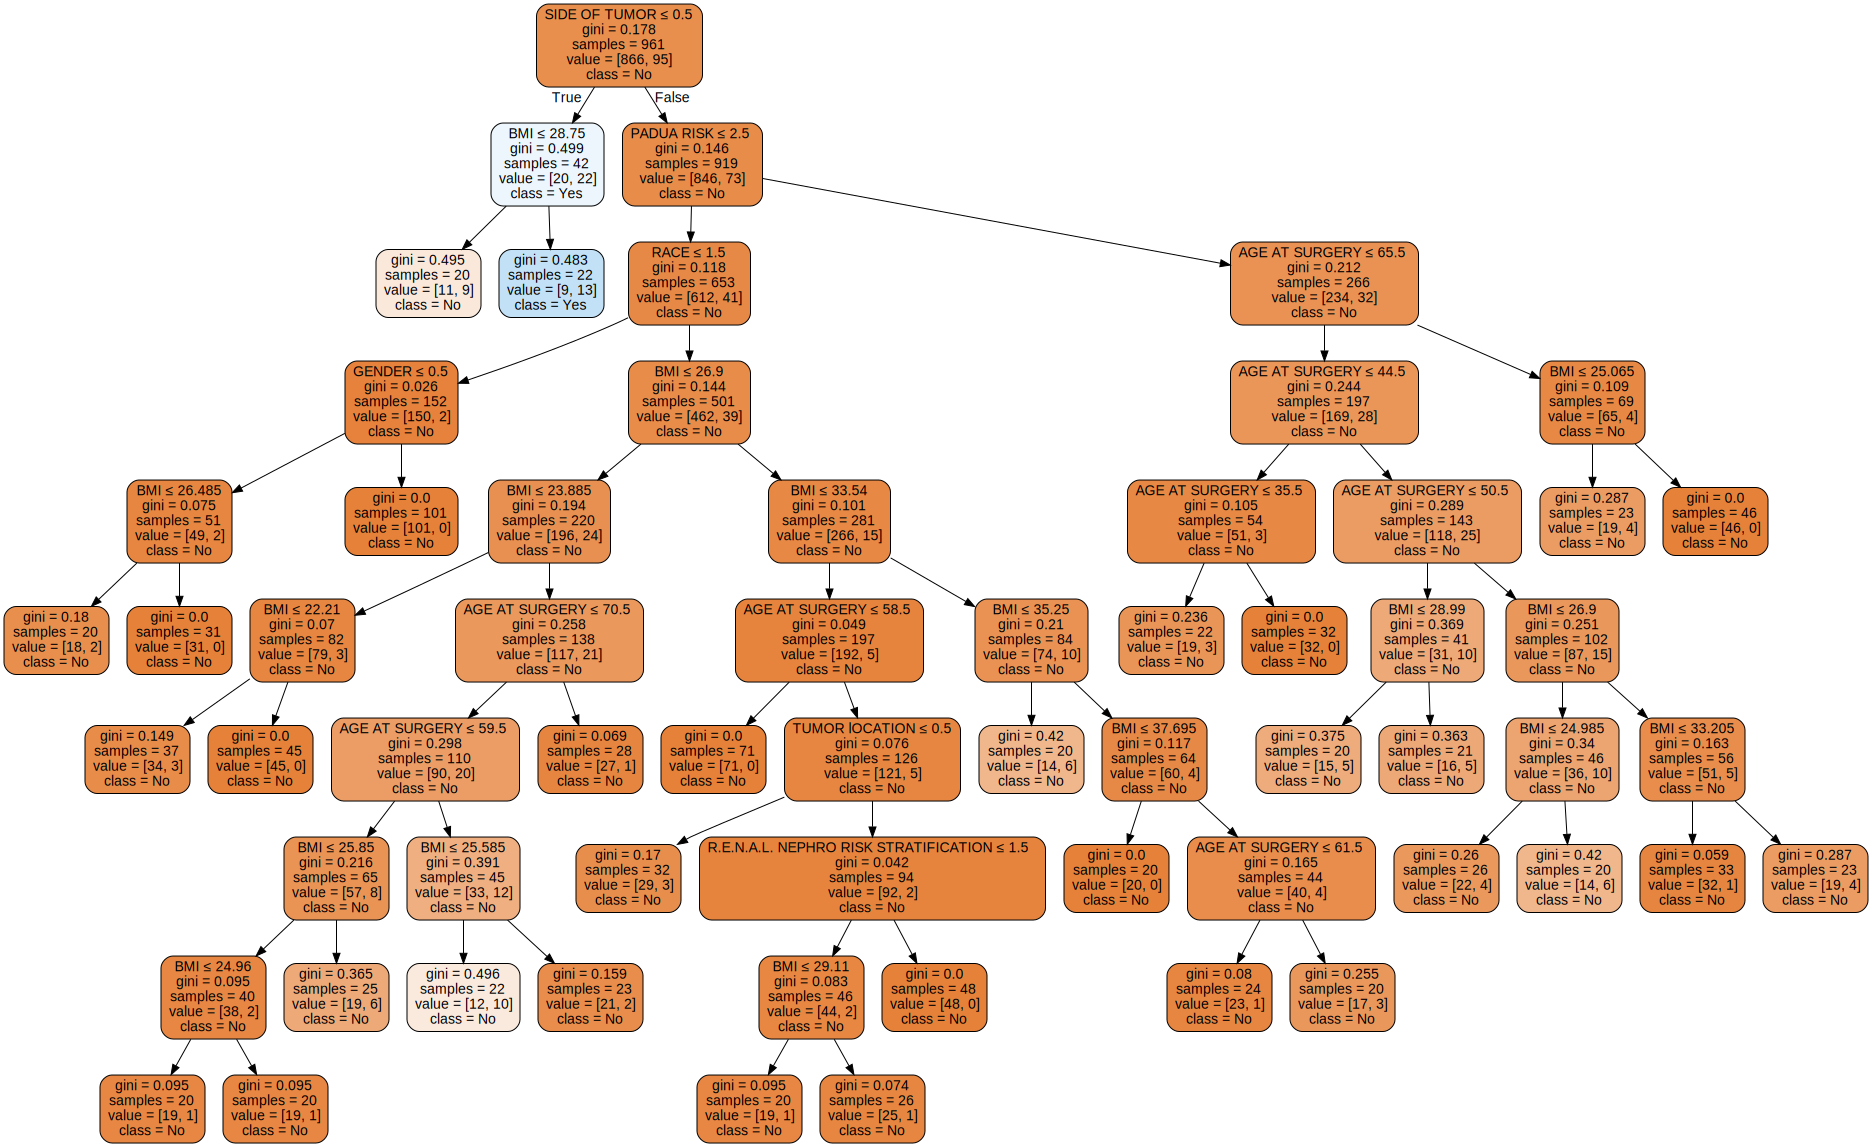

In [40]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(X),  
                         class_names=['No','Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("H:\RediMinds\DRMahen/test")
#graph.write_pdf("H:\RediMinds\DRMahen/iris.pdf")
graph 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = DecisionTreeClassifier()
parameter_dist = { 'max_features':["auto",'sqrt','log2',None],'max_depth': list(range(1,50)),
                  'min_samples_leaf': [10]}  
classifier = GridSearchCV(model, parameter_dist, n_jobs = -1, scoring = 'neg_mean_squared_error')
results = classifier.fit(X_train, Y_train)
classifier.cv_results_
y_best_params = classifier.best_params_
y_best_score = classifier.best_score_
y = classifier.predict(X_test)





H:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [42]:
metrics

<module 'sklearn.metrics' from 'H:\\Anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [43]:
print(y_best_params)
print("\n Model Accuracy: \n"+str(metrics.accuracy_score(Y_test, y)))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(Y_test, y)))

print("\n Confusion Matrix: \n"+ str(metrics.classification_report(Y_test, y)))

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 10}

 Model Accuracy: 
0.941908713692946

 Model Balanced Accuracy: 
0.5644542772861357

 Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       226
           1       0.67      0.13      0.22        15

   micro avg       0.94      0.94      0.94       241
   macro avg       0.81      0.56      0.60       241
weighted avg       0.93      0.94      0.92       241



In [44]:
np.unique(y)

array([0, 1], dtype=int64)

In [45]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestClassifier(random_state= 42)
parameter_dist = {'n_estimators': [1,5,10,20,100,200,300], 'max_features':['auto','sqrt','log2'],
  'min_samples_leaf': [1]
}  
classifier_RFR = GridSearchCV(model, parameter_dist, n_jobs = -1,cv=5, scoring = 'balanced_accuracy', return_train_score=True)
results = classifier_RFR.fit(X_train, Y_train)


y_RFR_best_params = classifier_RFR.best_params_
y_RFR_best_score = classifier_RFR.best_score_
y_RFR = classifier_RFR.predict(X_test)




In [46]:
pd.DataFrame(classifier_RFR.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.129457,0.005133,0.005058,0.000373,auto,1,1,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.555959,0.553240,...,0.528014,0.030754,7,0.874430,0.788287,0.839390,0.835147,0.816682,0.830787,0.028295
1,0.125688,0.003939,0.005158,0.001200,auto,1,5,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.511948,0.523730,...,0.510788,0.026548,19,0.925464,0.906452,0.893294,0.899151,0.905009,0.905874,0.010847
2,0.127076,0.003110,0.005951,0.001041,auto,1,10,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.494253,0.517645,...,0.522308,0.027313,16,0.960526,0.940789,0.934211,0.914474,0.914474,0.932895,0.017356
3,0.167846,0.039931,0.006646,0.000507,auto,1,20,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.488506,0.561606,...,0.525256,0.029862,10,0.980263,0.973684,0.967105,0.973684,0.967105,0.972368,0.004923
4,0.203955,0.020988,0.023908,0.007498,auto,1,100,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.491379,0.590812,...,0.532824,0.036194,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.473678,0.020809,0.026685,0.003064,auto,1,200,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.491379,0.593702,...,0.533978,0.037262,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.634880,0.088607,0.045632,0.012250,auto,1,300,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.491379,0.567387,...,0.524040,0.029097,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.114674,0.002205,0.004466,0.000004,sqrt,1,1,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.555959,0.553240,...,0.528014,0.030754,7,0.874430,0.788287,0.839390,0.835147,0.816682,0.830787,0.028295
8,0.136202,0.014282,0.004465,0.000544,sqrt,1,5,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.511948,0.523730,...,0.510788,0.026548,19,0.925464,0.906452,0.893294,0.899151,0.905009,0.905874,0.010847
9,0.115767,0.003178,0.004960,0.000830,sqrt,1,10,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.494253,0.517645,...,0.522308,0.027313,16,0.960526,0.940789,0.934211,0.914474,0.914474,0.932895,0.017356


In [47]:
feature_importances = pd.DataFrame(classifier_RFR.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
BMI,0.329137
AGE AT SURGERY,0.249762
SIDE OF TUMOR,0.098991
TUMOR lOCATION,0.076492
PADUA RISK,0.053317
RACE,0.051077
R.E.N.A.L. NEPHRO RISK STRATIFICATION,0.047762
GENDER,0.044578
BILATERALITY OF TUMOR,0.034519
SOLITARY KIDNEY,0.014365


In [48]:
print("\n Best Parameter \n"+str(y_RFR_best_params))
print("\n Model Accuracy Score \n"+str(metrics.accuracy_score(Y_test, y_RFR)))
print("\n Model Balanced Accuracy \n"+str(metrics.balanced_accuracy_score(Y_test, y_RFR)))
print("\n Classification report\n "+str(metrics.classification_report(Y_test, y_RFR)))


 Best Parameter 
{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}

 Model Accuracy Score 
0.9336099585062241

 Model Balanced Accuracy 
0.5911504424778761

 Classification report
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       226
           1       0.43      0.20      0.27        15

   micro avg       0.93      0.93      0.93       241
   macro avg       0.69      0.59      0.62       241
weighted avg       0.92      0.93      0.92       241



In [49]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [50]:
dict_unique = {col:list(df_filter2[col].unique()) for col in X.select_dtypes('category')}

In [51]:
f = open("H:\RediMinds\DRMahen/dict_unique.txt","w")
f.write( str(dict_unique) )
f.close()

In [73]:
# open the file for writing
import pickle
#serializing our model to a file called model.pkl
pickle.dump(classifier_RFR, open("H:\RediMinds\DRMahen/model.pkl","wb"))

# this writes the object to the open file


In [71]:
#loading a model from a file called model.pkl
model = pickle.load(open("H:\RediMinds\DRMahen/model.pkl","rb"))